## How to Perform Data Cleaning for Machine Learning with Python
### I. Code samples
#### 1. Identifying columns that contain a single value
##### a. Using regular Python code

In [2]:
# summarize the number of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


##### b. Using nunique() Pandas function

In [3]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


#### 2. Delete columns that contain a single value

In [4]:
# delete columns with a single unique value
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


#### 3. Consider columns that have very few values

In [6]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [8]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100
    if percentage < 1:
        print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [9]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


#### 4. Remove columns that have a low variance

In [10]:
# example of apply the variance threshold
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


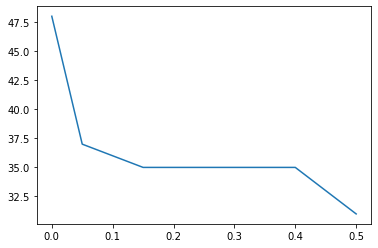

In [12]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

#### 5. Identify rows that contain duplicate data

In [13]:
# locate rows of duplicate data
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


#### 6. Delete rows that contain duplicate data

In [14]:
# delete rows of duplicate data from the dataset
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)


Comentario: sería interesante ver si hay alguna forma de transformar el tipo de dato dentro de la columna. Por ejemplo, si se tiene una columna con dígitos que corresponde a cantidades de dinero, poder aplicar una transformación, la cual permita visualizar más fácilmente que se está hablando de dólares o la moneda que sea. 

## II. Tutorial report

Este tutorial es bastante complementario con el primer tutorial de esta práctica, donde podemos ver algunas de las técnicas mencionadas en acción para la limpieza y la preparación de los datos. Es realmente una buena y fácil manera de visualizar este tipo de operaciones, ya que con lo aprendido en el primer tutorial, permite observar que las operaciones son relativamente sencillas de aplicar. 

Pensando en una combinación entre el primer tutorial y este, definitivamente podrían aplicarse en una forma profesional y, al igual que puse en el reporte del primer tutorial, no solo tiene que ser exclusivo el uso a aprendizaje mecánico. A la hora de trabajar con bases de datos, en caso de no tener un ambiente de pruebas, sería muy útil en casos de pruebas de nuevos procesos que se quieran implementar dentro de la base de datos misma, donde se pueden descargar las filas en cuestión y transformarlas a como sea necesario en forma de test, para que a partir de estos resultados, se pueda implementar de forma correcta en el debido ambiente. 